In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
train_df = pd.read_csv("CC2020_train_final.csv")
test_df = pd.read_csv("CC2020_test_final.csv")

In [0]:
train_df.head()

,YEAR,LOCATION,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD
0,18,Loc 5608,Inbred_142,Cluster11,Tester_740,Cluster10,1.135462
1,18,Loc 4533,Inbred_142,Cluster11,Tester_740,Cluster10,1.139813
2,18,Loc 5620,Inbred_142,Cluster11,Tester_740,Cluster10,1.117778
3,18,Loc 4732,Inbred_142,Cluster11,Tester_740,Cluster10,1.171366
4,18,Loc 5500,Inbred_142,Cluster11,Tester_740,Cluster10,1.059364


In [0]:
train_df = train_df[['INBRED', 'TESTER', 'YIELD']]

In [0]:
train_df['YIELD'].min()

0.047235945

In [0]:
train_df['YIELD'].max()

1.8000826730000001

In [0]:
train_df.head(20)

,INBRED,TESTER,YIELD
0,Inbred_142,Tester_740,1.135462
1,Inbred_142,Tester_740,1.139813
2,Inbred_142,Tester_740,1.117778
3,Inbred_142,Tester_740,1.171366
4,Inbred_142,Tester_740,1.059364
5,Inbred_142,Tester_740,1.040588
6,Inbred_142,Tester_740,1.002265
7,Inbred_142,Tester_740,0.971066
8,Inbred_142,Tester_743,1.289008
9,Inbred_142,Tester_743,0.960433


In [0]:
grouped_df = train_df.groupby(['INBRED','TESTER'], as_index=False).mean()

In [0]:
grouped_df.head()

,INBRED,TESTER,YIELD
0,Inbred_1071,Tester_1345,0.986544
1,Inbred_1071,Tester_4373,1.057704
2,Inbred_1071,Tester_4473,1.023704
3,Inbred_1071,Tester_4541,1.014735
4,Inbred_1071,Tester_5305,1.062727


In [0]:
len(grouped_df)

10919

In [0]:
test_df.head()

,INBRED,INBRED_CLUSTER,TESTER,TESTER_CLUSTER,YIELD
0,Inbred_1071,Cluster8,Tester_5450,Cluster5,NaN
1,Inbred_122,Cluster12,Tester_4336,Cluster6,NaN
2,Inbred_1337,Cluster17,Tester_2652,Cluster1,NaN
3,Inbred_1337,Cluster17,Tester_4373,Cluster3,NaN
4,Inbred_1339,Cluster17,Tester_4238,Cluster11,NaN


In [0]:
grouped_df['YIELD'].min()

0.6502730801666666

In [0]:
grouped_df['YIELD'].max()

1.2400148732500003

In [0]:
grouped_df['YIELD'] = np.log(grouped_df['YIELD']).values

In [0]:
grouped_df.head()

,INBRED,TESTER,YIELD
0,Inbred_1071,Tester_1345,-0.013548
1,Inbred_1071,Tester_4373,0.056100
2,Inbred_1071,Tester_4473,0.023427
3,Inbred_1071,Tester_4541,0.014627
4,Inbred_1071,Tester_5305,0.060838


In [0]:
train_df = grouped_df

In [0]:
len(train_df)

10919

In [0]:
print(len(train_df['INBRED'].unique()))
print(len(train_df['TESTER'].unique()))


593
496


In [0]:
inbred_index = {}
tester_index = {}
i = 0
j = 0
for idx, row in train_df.iterrows():
    if row['INBRED'] not in inbred_index:
        inbred_index[row['INBRED']] = i
        i += 1
    if row['TESTER'] not in tester_index:
        tester_index[row['TESTER']] = j
        j += 1
print(len(inbred_index))
print(len(tester_index))
print(i)
print(j)

593
496
593
496


In [0]:
n_inbred = 593
n_tester = 496
mat = np.zeros((n_inbred, n_tester))
for row in train_df.itertuples():
    mat[inbred_index[row[1]], tester_index[row[2]]] = row[3]
mat

array([[-0.01354771,  0.0561005 ,  0.02342727, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.02078493,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
print(np.exp(mat).max())

1.2400148732500003


In [0]:
print (str(n_inbred) + ' inbred')
print (str(n_tester) + ' tester')
sparsity = float(len(mat.nonzero()[0]))
sparsity /= (mat.shape[0] * mat.shape[1])
sparsity *= 100
print ('Sparsity: {:4.2f}%'.format(sparsity))

593 inbred
496 tester
Sparsity: 3.71%


In [0]:
def train_test_split(mat):
    test = np.zeros(mat.shape)
    train = mat.copy()
    for inbred in range(mat.shape[0]):
        test_yields = np.random.choice(mat[inbred, :].nonzero()[0], 
                                        size=max(1, len(mat[inbred, :].nonzero()[0])//10), 
                                        replace=False)
        train[inbred, test_yields] = 0.
        test[inbred, test_yields] = mat[inbred, test_yields]
        
    # Test and training are truly disjoint
    assert(np.all((train * test) == 0)) 
    return train, test

In [0]:
train, test = train_test_split(mat)

In [0]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [0]:
# SGD method

#optimal learning rate is 0.01, just train longer, test mse is still going down

In [0]:
iter_array = [1, 2, 5, 10, 25, 50, 100, 200]
latent_factors = [2, 5, 10, 20, 40, 80]
regularizations = [0.001, 0.01, 0.1, 1.]
regularizations.sort()

best_params = {}
best_params['n_factors'] = latent_factors[0]
best_params['reg'] = regularizations[0]
best_params['n_iter'] = 0
best_params['train_mse'] = np.inf
best_params['test_mse'] = np.inf
best_params['model'] = None

for fact in latent_factors:
    print ('Factors: {}'.format(fact))
    for reg in regularizations:
        print ('Regularization: {}'.format(reg))
        MF_SGD = ExplicitMF(train, n_factors=fact, learning='sgd',\
                            user_fact_reg=reg, item_fact_reg=reg, \
                            user_bias_reg=reg, item_bias_reg=reg)
        MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.01)
        min_idx = np.argmin(MF_SGD.test_mse)
        if MF_SGD.test_mse[min_idx] < best_params['test_mse']:
            best_params['n_factors'] = fact
            best_params['reg'] = reg
            best_params['n_iter'] = iter_array[min_idx]
            best_params['train_mse'] = MF_SGD.train_mse[min_idx]
            best_params['test_mse'] = MF_SGD.test_mse[min_idx]
            best_params['model'] = MF_SGD
            print ('New optimal hyperparameters')
            print (pd.Series(best_params))

Factors: 2
Regularization: 0.001
New optimal hyperparameters
n_factors                                                 2
reg                                                   0.001
n_iter                                                  200
train_mse                                        0.00217992
test_mse                                         0.00687204
model        <__main__.ExplicitMF object at 0x7f9e73ce5cf8>
dtype: object
Regularization: 0.01
New optimal hyperparameters
n_factors                                                 2
reg                                                    0.01
n_iter                                                  200
train_mse                                         0.0021357
test_mse                                         0.00421075
model        <__main__.ExplicitMF object at 0x7f9e73cadf60>
dtype: object
Regularization: 0.1
New optimal hyperparameters
n_factors                                                 2
reg                               

The optimal regularization is 0.1, factor is 40, iteration is 50. Test mse is 0.002766.

In [0]:
#Using optimal parameters:
MF_SGD = ExplicitMF(train,
                    n_factors=40,
                    learning='sgd',
                    item_fact_reg=0.1, 
                    user_fact_reg=0.1,
                    item_bias_reg=0.1,
                    user_bias_reg=0.1,
                    verbose=False)
iter_array = [1, 2, 5, 10, 25, 50, 100, 200]
MF_SGD.calculate_learning_curve(iter_array, test, learning_rate=0.001)

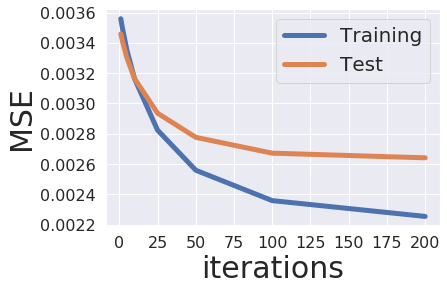

In [0]:
plot_learning_curve(iter_array, MF_SGD)

In [0]:
#optimal mse with 200 iterations, lr = 0.001, reg = 0.1
sgd_pred = MF_SGD.predict_all()
sgd_pred = np.exp(sgd_pred)
print(sgd_pred.min())
print(sgd_pred.max())
print(get_mse(sgd_pred, np.exp(test)))
print((np.exp(train)).max(), (np.exp(train)).min())
print((np.exp(test)).max(), (np.exp(test)).min())

0.7850286788471259
1.1333628524133736
0.0012093682620044092
1.2400148732500003 0.6502730801666666
1.2003269764444444 0.769659925


In [0]:
#mse with 200 iterations, lr = 0.001, reg = 0.0
sgd_pred = MF_SGD.predict_all()

In [0]:
sgd_pred = np.exp(sgd_pred)

In [0]:
print(sgd_pred.min())
print(sgd_pred.max())

0.774166564201764
1.1468905674972405


In [0]:
get_mse(sgd_pred, np.exp(test))

0.001398625431115368

In [0]:
np.sqrt(0.001398625431115368)

0.03739820090746837

In [0]:
np.exp(test[test.nonzero()])

array([0.99595989, 1.0935703 , 0.92989218, 0.9733557 , 0.98020322,
       1.09808822, 1.02801922, 1.0007896 , 1.1075743 , 1.0408443 ,
       1.07213042, 1.04683444, 1.01284143, 0.97304463, 1.1144358 ,
       1.0038347 , 1.02003998, 1.0230238 , 1.03643716, 1.0297199 ,
       1.02979271, 0.9093601 , 0.89887879, 1.04954327, 1.00333398,
       1.00643438, 1.00612108, 0.9476967 , 0.9670515 , 0.96192659,
       1.00403296, 0.98646296, 0.99807117, 0.99212444, 0.9777635 ,
       0.98582016, 0.98830197, 1.05953311, 1.04365136, 0.95792964,
       1.12376709, 1.00134136, 0.9386786 , 0.98295916, 0.95625396,
       1.1323969 , 0.98996853, 1.0871176 , 1.12018473, 1.09481536,
       0.96762568, 0.9880103 , 0.99925098, 0.96226657, 1.01447403,
       1.01577157, 1.04424918, 1.03120578, 1.0229613 , 1.07295956,
       1.02395942, 0.99742515, 1.09492782, 1.01996826, 0.96780167,
       0.96156357, 1.14101241, 0.91338632, 1.02173775, 0.93447344,
       0.95314969, 1.03729349, 1.0119981 , 1.04612653, 1.06370

In [0]:
print((np.exp(train)).max(), (np.exp(train)).min())

1.2400148732500003 0.6502730801666666


In [0]:
print((np.exp(test)).max(), (np.exp(test)).min())

1.1749222929166667 0.7238177681666667


In [0]:
print((np.exp(mat)).max(), (np.exp(mat)).min())

1.2400148732500003 0.6502730801666666


In [0]:
#mse of ALS method 
als_pred = MF_ALS.predict_all()
als_pred = np.exp(als_pred)
print(als_pred.min())
print(als_pred.max())
print(get_mse(als_pred, np.exp(test))) # it is better than SGD method :o 
print((np.exp(train)).max(), (np.exp(train)).min())
print((np.exp(test)).max(), (np.exp(test)).min())

0.6830645062841967
1.2048353840408792
3.8004391371094696e-05
1.2400148732500003 0.6502730801666666
1.2003269764444444 0.769659925


In [0]:
print(get_mse(als_pred, np.exp(test)))

3.8004391371094696e-05


(array([4.00000e+00, 4.00000e+00, 8.00000e+00, 2.60000e+01, 2.06000e+02,
        1.54660e+04, 2.78224e+05, 1.80000e+02, 8.00000e+00, 2.00000e+00]),
 array([0.68306451, 0.73524159, 0.78741868, 0.83959577, 0.89177286,
        0.94394995, 0.99612703, 1.04830412, 1.10048121, 1.1526583 ,
        1.20483538]),
 <a list of 10 Patch objects>)

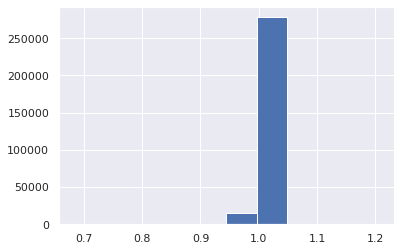

In [0]:
plt.hist(np.exp(MF_ALS.predict_all()).flatten())

(array([2.10000e+01, 2.42000e+02, 1.14200e+03, 7.83500e+03, 3.80630e+04,
        1.02331e+05, 1.08116e+05, 3.36240e+04, 2.66200e+03, 9.20000e+01]),
 array([0.78502868, 0.8198621 , 0.85469551, 0.88952893, 0.92436235,
        0.95919577, 0.99402918, 1.0288626 , 1.06369602, 1.09852944,
        1.13336285]),
 <a list of 10 Patch objects>)

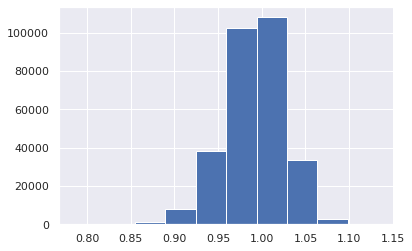

In [0]:
plt.hist(np.exp(MF_SGD.predict_all()).flatten())

(array([7.0000e+00, 8.2000e+01, 1.3000e+01, 1.0558e+04, 5.1000e+01,
        2.4000e+01, 1.4000e+02, 3.8000e+01, 0.0000e+00, 6.0000e+00]),
 array([0.92314956, 0.94503098, 0.9669124 , 0.98879382, 1.01067525,
        1.03255667, 1.05443809, 1.07631951, 1.09820093, 1.12008235,
        1.14196378]),
 <a list of 10 Patch objects>)

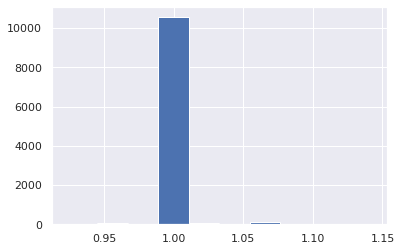

In [0]:
plt.hist(np.exp(mat.flatten()[mat.nonzero()[0]]))

In [0]:
mat.flatten()[mat.nonzero()[0]]

array([-0.01354771, -0.01354771, -0.01354771, ...,  0.        ,
        0.        ,  0.        ])

In [0]:
(mat.nonzero()[0]).flatten().shape

(10919,)

Below is SGD with Pascal's Method:

In [0]:
n = 593 #inbred
m = 496 #tester

In [0]:
for k,v in inbred_index.items():
    print(k,v)
    break

Inbred_1071 0


In [0]:
#mean square error
def mse(n,m,U,V,S_mat, S_dict, average = False):
    loss = 0
    num_elements = S_mat.nnz
    if not average:
        for (k,v) in S_dict.items():
            loss += (U[k[0],:].dot(V[k[1],:]) - v)**2
    else:
        for (k,v) in S_dict.items():
            loss += (U[k[0]]*V[k[1]] - v)**2      
    return (loss/num_elements)

In [0]:
#mean square error after exponential to convert back to non-negative
def mse_exp(n,m,U,V,S_mat, S_dict, average = False):
    loss = 0
    num_elements = S_mat.nnz
    if not average:
        for (k,v) in S_dict.items():
            loss += (np.exp(U[k[0],:].dot(V[k[1],:])) - np.exp(v))**2
    else:
        for (k,v) in S_dict.items():
            loss += (U[k[0]]*V[k[1]] - v)**2      
    return (loss/num_elements)

In [0]:
def mae(n,m,U,V,S_mat, S_dict, average = False):
    loss = 0
    num_elements = S_mat.nnz
    if not average:
        for (k,v) in S_dict.items():
            loss += np.abs(U[k[0],:].dot(V[k[1],:]) - v)
    else:
        for (k,v) in S_dict.items():
            loss += np.abs(U[k[0]]*V[k[1]] - v)      
    return (loss/num_elements)

In [0]:
#mean abs error
def mae1(n,m,U,V,S_mat,S_dict, average = False):
    loss = 0
    for i in range(n): #n users
        user_i = S_mat.getrow(i)
        N = user_i.size
        sum_user_i = 0
        if not average:
            for j in range(m): #j ratings
                if (i,j) in S_dict:
                    sum_user_i += np.abs(U[i,:].dot(V[j,:]) - S_dict[(i,j)]) #S_mat.todok()[i,j])
        else:
            for j in range(m): # j ratings
                if (i,j) in S_dict:
                    sum_user_i += np.abs(U[i]*V[j] - S_dict[(i,j)]) #- S_mat.todok()[i,j])
        loss += sum_user_i

In [0]:
# import sparse module from SciPy package 
from scipy import sparse
# import uniform module to create random numbers
from scipy.stats import uniform
import scipy
from scipy.sparse.linalg import svds, eigs

In [0]:
#Parse to sparse matrix
i_index = []
j_index = []
s_rating = []

user_dict = {}
joke_dict = {}
for idx, row in train_df.iterrows():
    i_index.append(inbred_index[row['INBRED']])
    j_index.append(tester_index[row['TESTER']])
    s_rating.append(row['avg'])
    if inbred_index[row['INBRED']] not in user_dict:
        user_dict[inbred_index[row['INBRED']]] = [tester_index[row['TESTER']]]
    else:
        user_dict[inbred_index[row['INBRED']]].append(tester_index[row['TESTER']])
    if tester_index[row['TESTER']] not in joke_dict:
        joke_dict[tester_index[row['TESTER']]] = [inbred_index[row['INBRED']]]
    else:
        joke_dict[tester_index[row['TESTER']]].append(inbred_index[row['INBRED']])

In [0]:
S_mat = sparse.coo_matrix((s_rating, (i_index, j_index)))

In [0]:
max(i_index)

590

In [0]:
S_mat.shape

(591, 494)

In [0]:
d = [1,2,5,10,20,50]
U, S, VT = svds(S_mat, k=d[2])

In [0]:
U.shape

(591, 5)

In [0]:
VT.shape

(5, 494)

In [0]:
S.shape

(5,)

In [0]:
len(train_df)

9827

In [0]:
len(user_dict)

591

In [0]:
len(set(j_index))

494

In [0]:
len(inbred_index)

591

In [0]:
494*591

291954

In [0]:
#Parse to dictionary
S_dict = {}
for i, row in train_df.iterrows():
    S_dict[(inbred_index[row['INBRED']], tester_index[row['TESTER']])] = row['avg']

In [0]:
# S_dict_test = {}
# for i, row in test_df.iterrows():
#     S_dict_test[(inbred_index[row['INBRED']], tester_index[row['TESTER']])] = row['avg']

KeyError: ignored

In [0]:
print(n)
print(m)

591
494


In [0]:
# We will try to update every joke and users (like Pascal suggests)
# E.g: for each user i
#          for each joke j of that user
#              update the vector of user i 
# Yayyy, it is decreasing, Pascal is awesome
# See if we can get to mse train around 16 
# Yes, we do get to 16 
lambda_ = 0.001
lr = 0.001
lr_v = 0.001
lr_u = 0.001
d = 5
U = np.random.randn(n,d)
V = np.random.randn(m,d)
loss = []
for iter in range(500):
    #fix u update v
    for j in range(m): #m jokes m = 100
        for user_idx in joke_dict[j]:
            V[j,:] -= lr*((U[user_idx,:].dot(V[j,:]) - S_dict[(user_idx, j)])*U[user_idx,:] + lambda_*V[j,:])   
    
    #fix v update u
    for i in range(n): #n users n = 24983
        for joke_idx in user_dict[i]:
            U[i,:] -= lr*((U[i,:].dot(V[joke_idx,:]) - S_dict[(i, joke_idx)])*V[joke_idx,:] + lambda_*U[i,:])
    
    loss.append(mse_exp(n,m,U,V,S_mat, S_dict,average = False))
    if iter %20 == 0:
        print("Iteration: {}, mse loss: {}".format(iter, loss[iter]))

Iteration: 0, mse loss: 125264.79101578952
Iteration: 20, mse loss: 19.649415879119452
Iteration: 40, mse loss: 1.693877401817201
Iteration: 60, mse loss: 0.5341265192423914
Iteration: 80, mse loss: 0.26403510295313903
Iteration: 100, mse loss: 0.16041633441385966
Iteration: 120, mse loss: 0.10938251696797907
Iteration: 140, mse loss: 0.08024227715112066
Iteration: 160, mse loss: 0.06190513085310399
Iteration: 180, mse loss: 0.049548453874345616
Iteration: 200, mse loss: 0.04078888206422171
Iteration: 220, mse loss: 0.03433256093463913
Iteration: 240, mse loss: 0.029424744624015467
Iteration: 260, mse loss: 0.025599449671718164
Iteration: 280, mse loss: 0.022555453160629367
Iteration: 300, mse loss: 0.020090517460024916
Iteration: 320, mse loss: 0.018064480759571417
Iteration: 340, mse loss: 0.01637754697567291
Iteration: 360, mse loss: 0.014956994834870336
Iteration: 380, mse loss: 0.013748756356190868
Iteration: 400, mse loss: 0.012711918689938876
Iteration: 420, mse loss: 0.01181503

In [0]:
print(U.shape)
print(V.shape)

(591, 5)
(494, 5)


In [0]:
res = U.dot(V.T)

In [0]:
(res < 0).sum()

146386

In [0]:
591*494

291954

In [0]:
res.min()

-11.719893582258566

(array([1.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 9.0000e+00,
        1.7000e+01, 4.7000e+01, 8.7000e+01, 2.0300e+02, 4.4700e+02,
        9.8700e+02, 2.4640e+03, 5.7170e+03, 1.3646e+04, 3.2783e+04,
        6.7135e+04, 1.1303e+05, 3.9316e+04, 1.0383e+04, 3.4810e+03,
        1.2750e+03, 5.4000e+02, 2.1700e+02, 8.3000e+01, 3.8000e+01,
        2.6000e+01, 8.0000e+00, 3.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([-11.11239681, -10.38967137,  -9.66694593,  -8.9442205 ,
         -8.22149506,  -7.49876963,  -6.77604419,  -6.05331875,
         -5.33059332,  -4.60786788,  -3.88514244,  -3.16241701,
         -2.43969157,  -1.71696614,  -0.9942407 ,  -0.27151526,
          0.45121017,   1.17393561,   1.89666105,   2.61938648,
          3.34211192,   4.06483735,   4.78756279,   5.51028823,
          6.23301366,   6.9557391 ,   7.67846453,   8.40118997,
          9.12391541,   9.84664084,  10.56936628]),
 <a list of 30 Patch objects>)

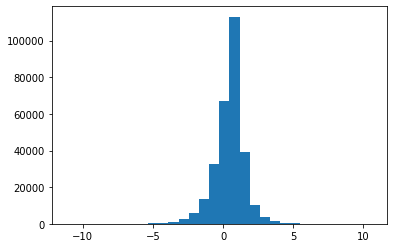

In [0]:
plt.hist(res.ravel(),bins=30)

(array([2.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 4.000e+00, 8.000e+00,
        1.700e+01, 1.800e+01, 2.100e+01, 5.300e+01, 9.600e+01, 1.400e+02,
        2.540e+02, 4.170e+02, 6.460e+02, 9.100e+02, 1.255e+03, 1.467e+03,
        1.487e+03, 1.170e+03, 7.840e+02, 4.910e+02, 3.050e+02, 1.400e+02,
        7.900e+01, 3.600e+01, 8.000e+00, 7.000e+00, 3.000e+00, 2.000e+00]),
 array([0.65027308, 0.66993114, 0.6895892 , 0.70924726, 0.72890532,
        0.74856338, 0.76822144, 0.7878795 , 0.80753756, 0.82719562,
        0.84685368, 0.86651174, 0.8861698 , 0.90582786, 0.92548592,
        0.94514398, 0.96480204, 0.9844601 , 1.00411816, 1.02377622,
        1.04343428, 1.06309234, 1.0827504 , 1.10240845, 1.12206651,
        1.14172457, 1.16138263, 1.18104069, 1.20069875, 1.22035681,
        1.24001487]),
 <a list of 30 Patch objects>)

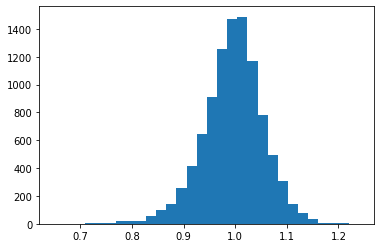

In [0]:
plt.hist(train_df['avg'].values, bins = 30)

In [0]:
res_exp = np.exp(res)

In [0]:
(res_exp < 0).sum()

0

(array([2.91887e+05, 3.60000e+01, 1.20000e+01, 4.00000e+00, 3.00000e+00,
        0.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([8.13045572e-06, 1.03231513e+03, 2.06463025e+03, 3.09694536e+03,
        4.12926048e+03, 5.16157560e+03, 6.19389072e+03, 7.22620584e+03,
        8.25852096e+03, 9.29083608e+03, 1.03231512e+04, 1.13554663e+04,
        1.23877814e+04, 1.34200966e+04, 1.44524117e+04, 1.54847268e+04,
        1.65170419e+04, 1.75493570e+04, 1.85816721e+04, 1.96139873e+04,
        2.06463024e+04, 2.16786175e+04, 2.27109326e+04, 2.37432477e+04,
        2.47755629e+04, 2.58078780e+04, 2.68401931e+04, 2.78725082e+04,
        2.89048233e+04, 2.99371384e+04, 3.09694536e+04])

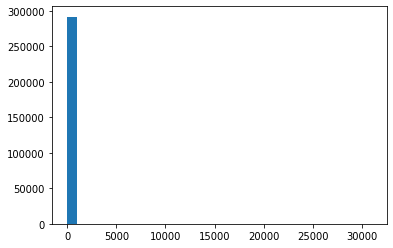

In [0]:
plt.hist(res_exp.ravel(),bins=30)

In [0]:
res_exp.min()

8.130455716718722e-06

In [0]:
res_exp.max()

30969.453568116267

In [0]:
(res_exp>5).sum()

14109

(array([11617., 12821., 14828., 17062., 22568., 67209., 63273., 16023.,
        10217.,  7330.,  5423.,  4339.,  3567.,  2950.,  2616.,  2107.,
         1862.,  1648.,  1432.,  1245.,  1109.,  1053.,   944.,   817.,
          758.,   704.,   663.,   576.,   564.,   520.]),
 array([8.13045572e-06, 1.66660805e-01, 3.33313479e-01, 4.99966153e-01,
        6.66618827e-01, 8.33271502e-01, 9.99924176e-01, 1.16657685e+00,
        1.33322952e+00, 1.49988220e+00, 1.66653487e+00, 1.83318755e+00,
        1.99984022e+00, 2.16649290e+00, 2.33314557e+00, 2.49979824e+00,
        2.66645092e+00, 2.83310359e+00, 2.99975627e+00, 3.16640894e+00,
        3.33306162e+00, 3.49971429e+00, 3.66636696e+00, 3.83301964e+00,
        3.99967231e+00, 4.16632499e+00, 4.33297766e+00, 4.49963034e+00,
        4.66628301e+00, 4.83293568e+00, 4.99958836e+00]),
 <a list of 30 Patch objects>)

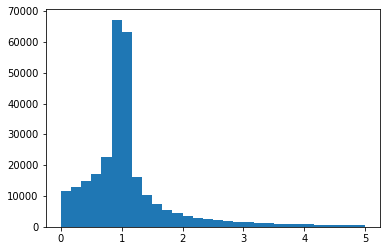

In [0]:
plt.hist(res_exp.ravel()[res_exp.ravel()<5],bins =30)